<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/ProyectoMLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Primer Proyecto de MLPs**

- El objetivo de este ejercicio es revisar todos los conceptos vistos en clase hasta ahora, para construir una arquitectura de red neuronal completamente conectada (MLP), que tenga el mejor desempeño posible sobre una tarea dada.

- La idea es que a través de la experimentación, lleguemos a construir un modelo robusto, que sirva como base para resolver otras tareas similares.

- El problema a resolver es de clasificación de imágenes usando CIFAR10.

##**Conjunto de Datos**

El conjunto de datos CIFAR10 tiene imágenes de 32x32 píxeles. Hay 50.000 imágenes de entrenamiento y 10.000 imágenes de pruebas. Cada imagen en CIFAR10 tiene asignada una de las diez clases disponibles.


In [20]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np





Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [21]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input, Dense, concatenate
#from tensorflow.keras.models import Model

##**Etapas mínimas a realizar**

Las etapas se encuentran enumeradas














1. Separar los conjuntos de entrenamiento, validación y prueba correspondientes.

In [22]:
(X_train_full, y_train_full), (X_test, y_test)=tf.keras.datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# conservamos la separacion entre entrenamiento X_train_full (50000) y prueba X_test (10000)
#separamos aleatoriamente X_train (37500) y X_valid (12500)

In [23]:
assert X_train_full.shape == (50000, 32, 32, 3)
assert y_train_full.shape == (50000, 1)
assert y_test.shape == (10000, 1)
assert X_train.shape == (37500, 32, 32, 3)
assert X_valid.shape == (12500, 32, 32, 3)

In [24]:
clases_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

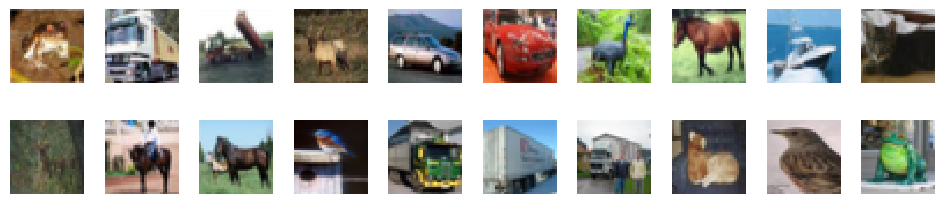

In [26]:
#Imprimimos los primeros 10 objetos
n_rows = 2
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):#
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)

        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        #plt.title(clases_names[y_train_full[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [27]:
X_train = X_train.reshape((X_train.shape[0], 32 * 32 * 3))
X_valid=X_valid.reshape((X_valid.shape[0], 32 * 32 * 3))
X_test = X_test.reshape((X_test.shape[0], 32 * 32 * 3))

2. Aplicar escala y normalización, si lo cree conveniente.

In [28]:
#Reducimos las intensidades de los píxeles al rango 0-1 dividiéndolas por 255.
#con ello normalizamos los datos y evitamos inestabilidad numérica
X_train=X_train/255
X_valid=X_valid/255
X_test=X_test/255

3. Usar el enfoque funcional (functional API) para definir la arquitectura de la red neuronal MLP.

In [29]:
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
#input_ = keras.layers.Input(shape=(32,32,3))

input_= keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(500, activation="relu")(input_)
hidden2 = keras.layers.Dense(400, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(300, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(200, activation="relu")(hidden3)
hidden5 = keras.layers.Dense(100, activation="relu")(hidden4)

concat = keras.layers.concatenate([input_, hidden5])

output = keras.layers.Dense(10,activation="softmax")(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3072)]               0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 500)                  1536500   ['input_4[0][0]']             
                                                                                                  
 dense_19 (Dense)            (None, 400)                  200400    ['dense_18[0][0]']            
                                                                                                  
 dense_20 (Dense)            (None, 300)                  120300    ['dense_19[0][0]']            
                                                                                            

4. La arquitectura debe ser profunda, con por lo menos 5 capas densas. Definir un número de neuronas para cada capa oculta, función de costo y justificar esas elecciones.

El número de neuronas se va definir cuando se realice el entrenamiento, por ahora seleccionamos 300 neuronas en cada capa densa ya cuando realizamos el entrenamiento podremos cambiar con otro numero si el accuracy es bajo.

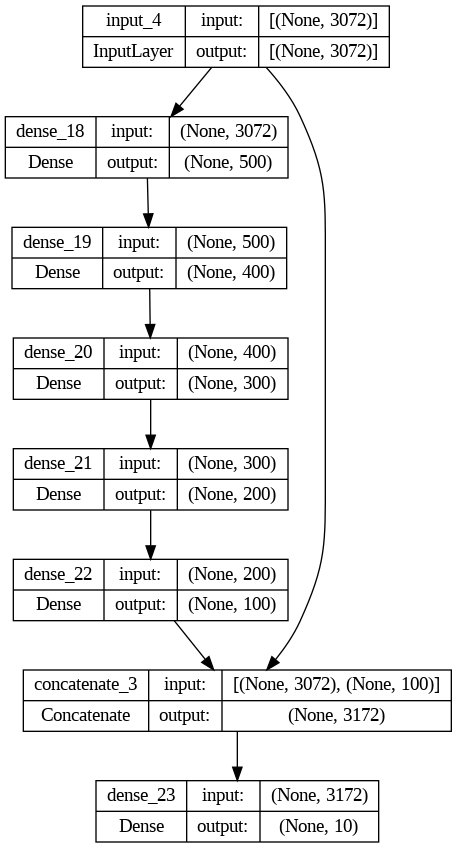

In [39]:
keras.utils.plot_model(model, "my_cifar10_model.png", show_shapes=True)

In [40]:
#compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#optimizer=keras.optimizers.SGD(learning_rate=1e-3)
#optimizer='adam'

 Para la arquitectura de nuestro modelo inicimos con 300 neuronas en todas las capas pero puede variar según el resultado del accuracy, utilizamos como función de costo (sparse_categorical_crossentropy) porque se tiene etiquetas con las clases(indices de 0 a 9) y la métrica que usaremos para entrenamiento y validación será ``accuracy`` por ser un problema de clasificacion

5. Usar Callbacks: ModelCheckpoint y EarlyStopping al momento de entrenar.

In [42]:
#usamos el callbacks para guardar checkpoints e interrumpir cuando no hay progreso
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo1_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [43]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo1_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 34s 29ms/step - loss: 1.9775 - accuracy: 0.3085 - val_loss: 1.8713 - val_accuracy: 0.3507
Epoch 2/100
1172/1172 [==============================] - 32s 27ms/step - loss: 1.8855 - accuracy: 0.3455 - val_loss: 1.8669 - val_accuracy: 0.3500
Epoch 3/100
1172/1172 [==============================] - 32s 27ms/step - loss: 1.8567 - accuracy: 0.3627 - val_loss: 1.9756 - val_accuracy: 0.3262
Epoch 4/100
1172/1172 [==============================] - 31s 27ms/step - loss: 1.8356 - accuracy: 0.3707 - val_loss: 1.8916 - val_accuracy: 0.3529
Epoch 5/100
1172/1172 [==============================] - 33s 28ms/step - loss: 1.8290 - accuracy: 0.3746 - val_loss: 1.8314 - val_accuracy: 0.3633
Epoch 6/100
1172/1172 [==============================] - 32s 27ms/step - loss: 1.8201 - accuracy: 0.3783 - val_loss: 1.7982 - val_accuracy: 0.3770
Epoch 7/100
1172/1172 [==============================] - 33s 28ms/step - loss: 1.8157 - accuracy: 0.3810 - val_loss: 1

In [44]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 3s 7ms/step - loss: 1.7988 - accuracy: 0.3910


[1.798760175704956, 0.39100000262260437]

6. Mostrar el gráfico de la función de costo en tiempo de entrenamiento vs tiempo de validación, para verificar si hay overfitting.

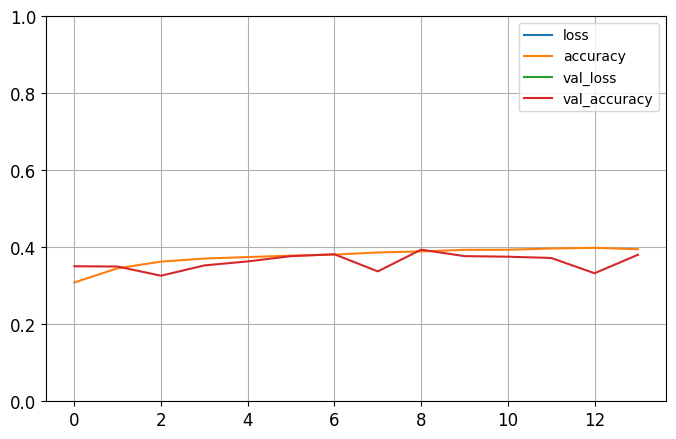

In [45]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

No se aprecia distanciamiento entre ambos gráficos por consiguiente podrías decir que no existe overfitting

6. Definir una función de activación y también un mecanismo de inicialización de pesos. Justificar esta elección.

Con el objetivo de prevenir que los gradientes se vuelvan demasiado grandes o demasiado pequeños durante el entrenamiento utilizamos la inicialización de pesos, como nuesta función de activación es RELU usaremos como el inicializar he_normal

In [46]:
input_= keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(input_)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(hidden1)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(hidden2)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(hidden3)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(hidden4)

concat = keras.layers.concatenate([input_, hidden5])

output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo2_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [51]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo2_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 33s 27ms/step - loss: 1.8096 - accuracy: 0.3826 - val_loss: 1.8359 - val_accuracy: 0.3736
Epoch 2/100
1172/1172 [==============================] - 33s 28ms/step - loss: 1.8027 - accuracy: 0.3818 - val_loss: 1.8532 - val_accuracy: 0.3608
Epoch 3/100
1172/1172 [==============================] - 32s 27ms/step - loss: 1.7969 - accuracy: 0.3878 - val_loss: 1.9608 - val_accuracy: 0.3367
Epoch 4/100
1172/1172 [==============================] - 31s 27ms/step - loss: 1.7890 - accuracy: 0.3904 - val_loss: 1.8913 - val_accuracy: 0.3617
Epoch 5/100
1172/1172 [==============================] - 33s 28ms/step - loss: 1.7923 - accuracy: 0.3913 - val_loss: 1.8321 - val_accuracy: 0.3705
Epoch 6/100
1172/1172 [==============================] - 32s 27ms/step - loss: 1.7905 - accuracy: 0.3931 - val_loss: 1.7966 - val_accuracy: 0.3820
Epoch 7/100
1172/1172 [==============================] - 33s 28ms/step - loss: 1.7949 - accuracy: 0.3916 - val_loss: 1

In [52]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 2s 6ms/step - loss: 1.8002 - accuracy: 0.3734


[1.8001500368118286, 0.3734000027179718]

In [ ]:
#Se aprecia una disminución de accuracy con respecto al modelo original de 0.391 a 0.373
#con el conjunto de datos de prueba al agregarle al modelo el inicializador

7. Usar el mecanismo de Batch Normalization. Justificar la elección de sus hiperparámetros.

Insertaremos una capa de bath normalizacion antes de cada capa densa y como hiperparametros, utilicé el momentum con un valor de 0.9 inicialmente y conseguí un accuracy de 0.49 con los datos de prueba y con un momentum de 0.999 se logró obtener un accuracy de 0.5156


In [60]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [61]:
input_= keras.layers.Input(shape=X_train.shape[1:])

bn_1 = keras.layers.BatchNormalization(momentum=0.999)(input_)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)

bn_2 = keras.layers.BatchNormalization(momentum=0.999)(hidden1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)

bn_3 = keras.layers.BatchNormalization(momentum=0.999)(hidden2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)

bn_4 = keras.layers.BatchNormalization(momentum=0.999)(hidden3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)

bn_5 = keras.layers.BatchNormalization(momentum=0.999)(hidden4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)

concat = keras.layers.concatenate([input_, hidden5])

bn_6 = keras.layers.BatchNormalization(momentum=0.999)(concat)
output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
#model.summary()

In [62]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [63]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo3_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [64]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo3_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 45s 35ms/step - loss: 2.0484 - accuracy: 0.3404 - val_loss: 1.9296 - val_accuracy: 0.3194
Epoch 2/100
1172/1172 [==============================] - 44s 37ms/step - loss: 1.8386 - accuracy: 0.3977 - val_loss: 1.8072 - val_accuracy: 0.3953
Epoch 3/100
1172/1172 [==============================] - 48s 41ms/step - loss: 1.7351 - accuracy: 0.4275 - val_loss: 1.7590 - val_accuracy: 0.4446
Epoch 4/100
1172/1172 [==============================] - 41s 35ms/step - loss: 1.6441 - accuracy: 0.4520 - val_loss: 1.7651 - val_accuracy: 0.4458
Epoch 5/100
1172/1172 [==============================] - 40s 34ms/step - loss: 1.5646 - accuracy: 0.4742 - val_loss: 1.6950 - val_accuracy: 0.4787
Epoch 6/100
1172/1172 [==============================] - 40s 34ms/step - loss: 1.4808 - accuracy: 0.4995 - val_loss: 1.7114 - val_accuracy: 0.4668
Epoch 7/100
1172/1172 [==============================] - 41s 35ms/step - loss: 1.4160 - accuracy: 0.5147 - val_loss: 1

In [65]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 2s 7ms/step - loss: 1.5707 - accuracy: 0.5156


[1.5707355737686157, 0.5156000256538391]

8. Usar un mecanismo de regularización (puede ser Dropout).

Con la finalidad de prevenir el sobreajuste.

Se ha experimentado con diferentes tasas de Dropout 0.5 y 0.1 obteniendose como accuracy de 0.469 y 0.5252 respectivamente, cabe recordar que el accuracy del modelo sin dropout fue 0.5156.
Nos quedamos con un dropout de 0.1 que fue el que logra incrementar ligeramente el accuracy con respecto al modelo anterior.

In [66]:
from tensorflow.keras.layers import Input, Dense, Dropout

In [73]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [74]:
input_= keras.layers.Input(shape=X_train.shape[1:])

bn_1 = keras.layers.BatchNormalization(momentum=0.99)(input_)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)
dropout1 = Dropout(0.1)(hidden1)

bn_2 = keras.layers.BatchNormalization(momentum=0.99)(dropout1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)
dropout2 = Dropout(0.1)(hidden2)

bn_3 = keras.layers.BatchNormalization(momentum=0.99)(dropout2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)
dropout3 = Dropout(0.1)(hidden3)

bn_4 = keras.layers.BatchNormalization(momentum=0.99)(dropout3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)
dropout4 = Dropout(0.1)(hidden4)

bn_5 = keras.layers.BatchNormalization(momentum=0.99)(dropout4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)
dropout5=Dropout(0.1)(hidden5)


concat = keras.layers.concatenate([input_,dropout5])

bn_6 = keras.layers.BatchNormalization(momentum=0.99)(concat)

output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [75]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [76]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo4_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [77]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo4_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 45s 35ms/step - loss: 2.0729 - accuracy: 0.3320 - val_loss: 1.8700 - val_accuracy: 0.3786
Epoch 2/100
1172/1172 [==============================] - 41s 35ms/step - loss: 1.8782 - accuracy: 0.3850 - val_loss: 1.8661 - val_accuracy: 0.3946
Epoch 3/100
1172/1172 [==============================] - 40s 34ms/step - loss: 1.7850 - accuracy: 0.4094 - val_loss: 1.7370 - val_accuracy: 0.4313
Epoch 4/100
1172/1172 [==============================] - 40s 35ms/step - loss: 1.7033 - accuracy: 0.4323 - val_loss: 1.6991 - val_accuracy: 0.4473
Epoch 5/100
1172/1172 [==============================] - 41s 35ms/step - loss: 1.6407 - accuracy: 0.4489 - val_loss: 1.6252 - val_accuracy: 0.4650
Epoch 6/100
1172/1172 [==============================] - 42s 36ms/step - loss: 1.5735 - accuracy: 0.4679 - val_loss: 1.6776 - val_accuracy: 0.4541
Epoch 7/100
1172/1172 [==============================] - 40s 34ms/step - loss: 1.5242 - accuracy: 0.4780 - val_loss: 1

In [78]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 2s 6ms/step - loss: 1.4195 - accuracy: 0.5252


[1.419496774673462, 0.5252000093460083]

9. Definir una función de optimización y justificar su elección.

Los modelos anteriores se entrenaron con el optimizador Adam sin embargo realizaremos el entrenamiento con otro optimizador Nadam.

Se vino trabajando con el optimizador Adam obteniendose un accuracy de 0.525, se probó con nadam accuracy de 0.498 y finalmente SDG 0.469, según los resultados conservamos el optimizador ADAM

In [89]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [90]:
input_= keras.layers.Input(shape=X_train.shape[1:])

bn_1 = keras.layers.BatchNormalization(momentum=0.99)(input_)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)

bn_2 = keras.layers.BatchNormalization(momentum=0.99)(hidden1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)

bn_3 = keras.layers.BatchNormalization(momentum=0.99)(hidden2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)

bn_4 = keras.layers.BatchNormalization(momentum=0.99)(hidden3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)

bn_5 = keras.layers.BatchNormalization(momentum=0.99)(hidden4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)

concat = keras.layers.concatenate([input_, hidden5])

bn_6 = keras.layers.BatchNormalization(momentum=0.99)(concat)
output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [91]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="ADAM",
              metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo5_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [92]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo5_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 41s 33ms/step - loss: 2.0534 - accuracy: 0.3393 - val_loss: 1.8644 - val_accuracy: 0.3852
Epoch 2/100
1172/1172 [==============================] - 38s 32ms/step - loss: 1.8377 - accuracy: 0.3979 - val_loss: 1.8565 - val_accuracy: 0.4090
Epoch 3/100
1172/1172 [==============================] - 38s 33ms/step - loss: 1.7321 - accuracy: 0.4286 - val_loss: 1.7121 - val_accuracy: 0.4450
Epoch 4/100
1172/1172 [==============================] - 41s 35ms/step - loss: 1.6424 - accuracy: 0.4515 - val_loss: 1.6932 - val_accuracy: 0.4498
Epoch 5/100
1172/1172 [==============================] - 39s 33ms/step - loss: 1.5633 - accuracy: 0.4755 - val_loss: 1.6118 - val_accuracy: 0.4745
Epoch 6/100
1172/1172 [==============================] - 38s 32ms/step - loss: 1.4786 - accuracy: 0.4999 - val_loss: 1.7228 - val_accuracy: 0.4562
Epoch 7/100
1172/1172 [==============================] - 37s 32ms/step - loss: 1.4138 - accuracy: 0.5144 - val_loss: 1

In [93]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 2s 7ms/step - loss: 1.5454 - accuracy: 0.4969


[1.5453659296035767, 0.4968999922275543]

10. Encontrar una taza de aprendizaje adecuada usando alguna estrategia de *Learning Rate Scheduling*. Justificar la elección de sus hiperparámetros.

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
input_= keras.layers.Input(shape=X_train.shape[1:])

bn_1 = keras.layers.BatchNormalization(momentum=0.99)(input_)
hidden1 = keras.layers.Dense(500, activation="relu",kernel_initializer="he_normal")(bn_1)
dropout1 = Dropout(0.5)(hidden1)

bn_2 = keras.layers.BatchNormalization(momentum=0.99)(dropout1)
hidden2 = keras.layers.Dense(400, activation="relu",kernel_initializer="he_normal")(bn_2)
dropout2 = Dropout(0.5)(hidden2)

bn_3 = keras.layers.BatchNormalization(momentum=0.99)(dropout2)
hidden3 = keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal")(bn_3)
dropout3 = Dropout(0.5)(hidden3)

bn_4 = keras.layers.BatchNormalization(momentum=0.99)(dropout3)
hidden4 = keras.layers.Dense(200, activation="relu",kernel_initializer="he_normal")(bn_4)
dropout4 = Dropout(0.5)(hidden4)

bn_5 = keras.layers.BatchNormalization(momentum=0.99)(dropout4)
hidden5 = keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal")(bn_5)
dropout5=Dropout(0.5)(hidden5)


concat = keras.layers.concatenate([input_,dropout5])

bn_6 = keras.layers.BatchNormalization(momentum=0.99)(concat)

output = keras.layers.Dense(10,activation="softmax",kernel_initializer="he_normal")(bn_6)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo5_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo6_keras.h5")

El acuraccy para conjunto de entrenamineto con una tasa de 0.5 de dropout fue , para 0.6 xxx fue y para 0.7 fue xxxx seleccionamos el dropout con el mejor resultado

11. Realizar un proceso de ajuste de hiperparámetros (los que considere convenientes), usando Keras Tuner.

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")

    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())

    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model


In [ ]:

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)#max_trials=5 experiemntos

random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)#parametros de los 3 modelos
top3_params[0].values  # best hyperparameter values del primer modelo

In [ ]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

In [ ]:
best_trial.metrics.get_last_value("val_accuracy")

12. Reporte el resultado final en el conjunto de prueba usando la(s) métrica(s) de clasificación seleccionada(s).

13. Definir una segunda arquitectura reutilizando todas las capas y sus pesos (a excepción de la capa de salida) haciendo una conexión *wide and deep*, de las entradas. Mejora el resultado?

##**Recomendaciones**

- Se pueden intentar otras optimizaciones adicionales, arquitecturas y afinamientos. El objetivo es intentar mejorar cada vez más la métrica del problema en cuestión.

- En la medida de lo posible, justifique las elecciones de arquitectura, hiperparámetros, etc.

- Es posible, que una arquitectura más simple resuelva mejor el problema, indicar esto después de haber probado la configuración básica propuesta.